##### Import Libraries / Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##### Load in Datasets, Perform Basic Cleaning & Operations

In [2]:
train_df = pd.read_csv("data/train.csv").dropna()
test_df = pd.read_csv("data/test.csv").dropna()

In [3]:
train_df.head(1)

76020 75818


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0


In [4]:
X = train_df.drop('TARGET',axis=1)
y = train_df[['TARGET']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95, random_state=42)

##### Create the Model

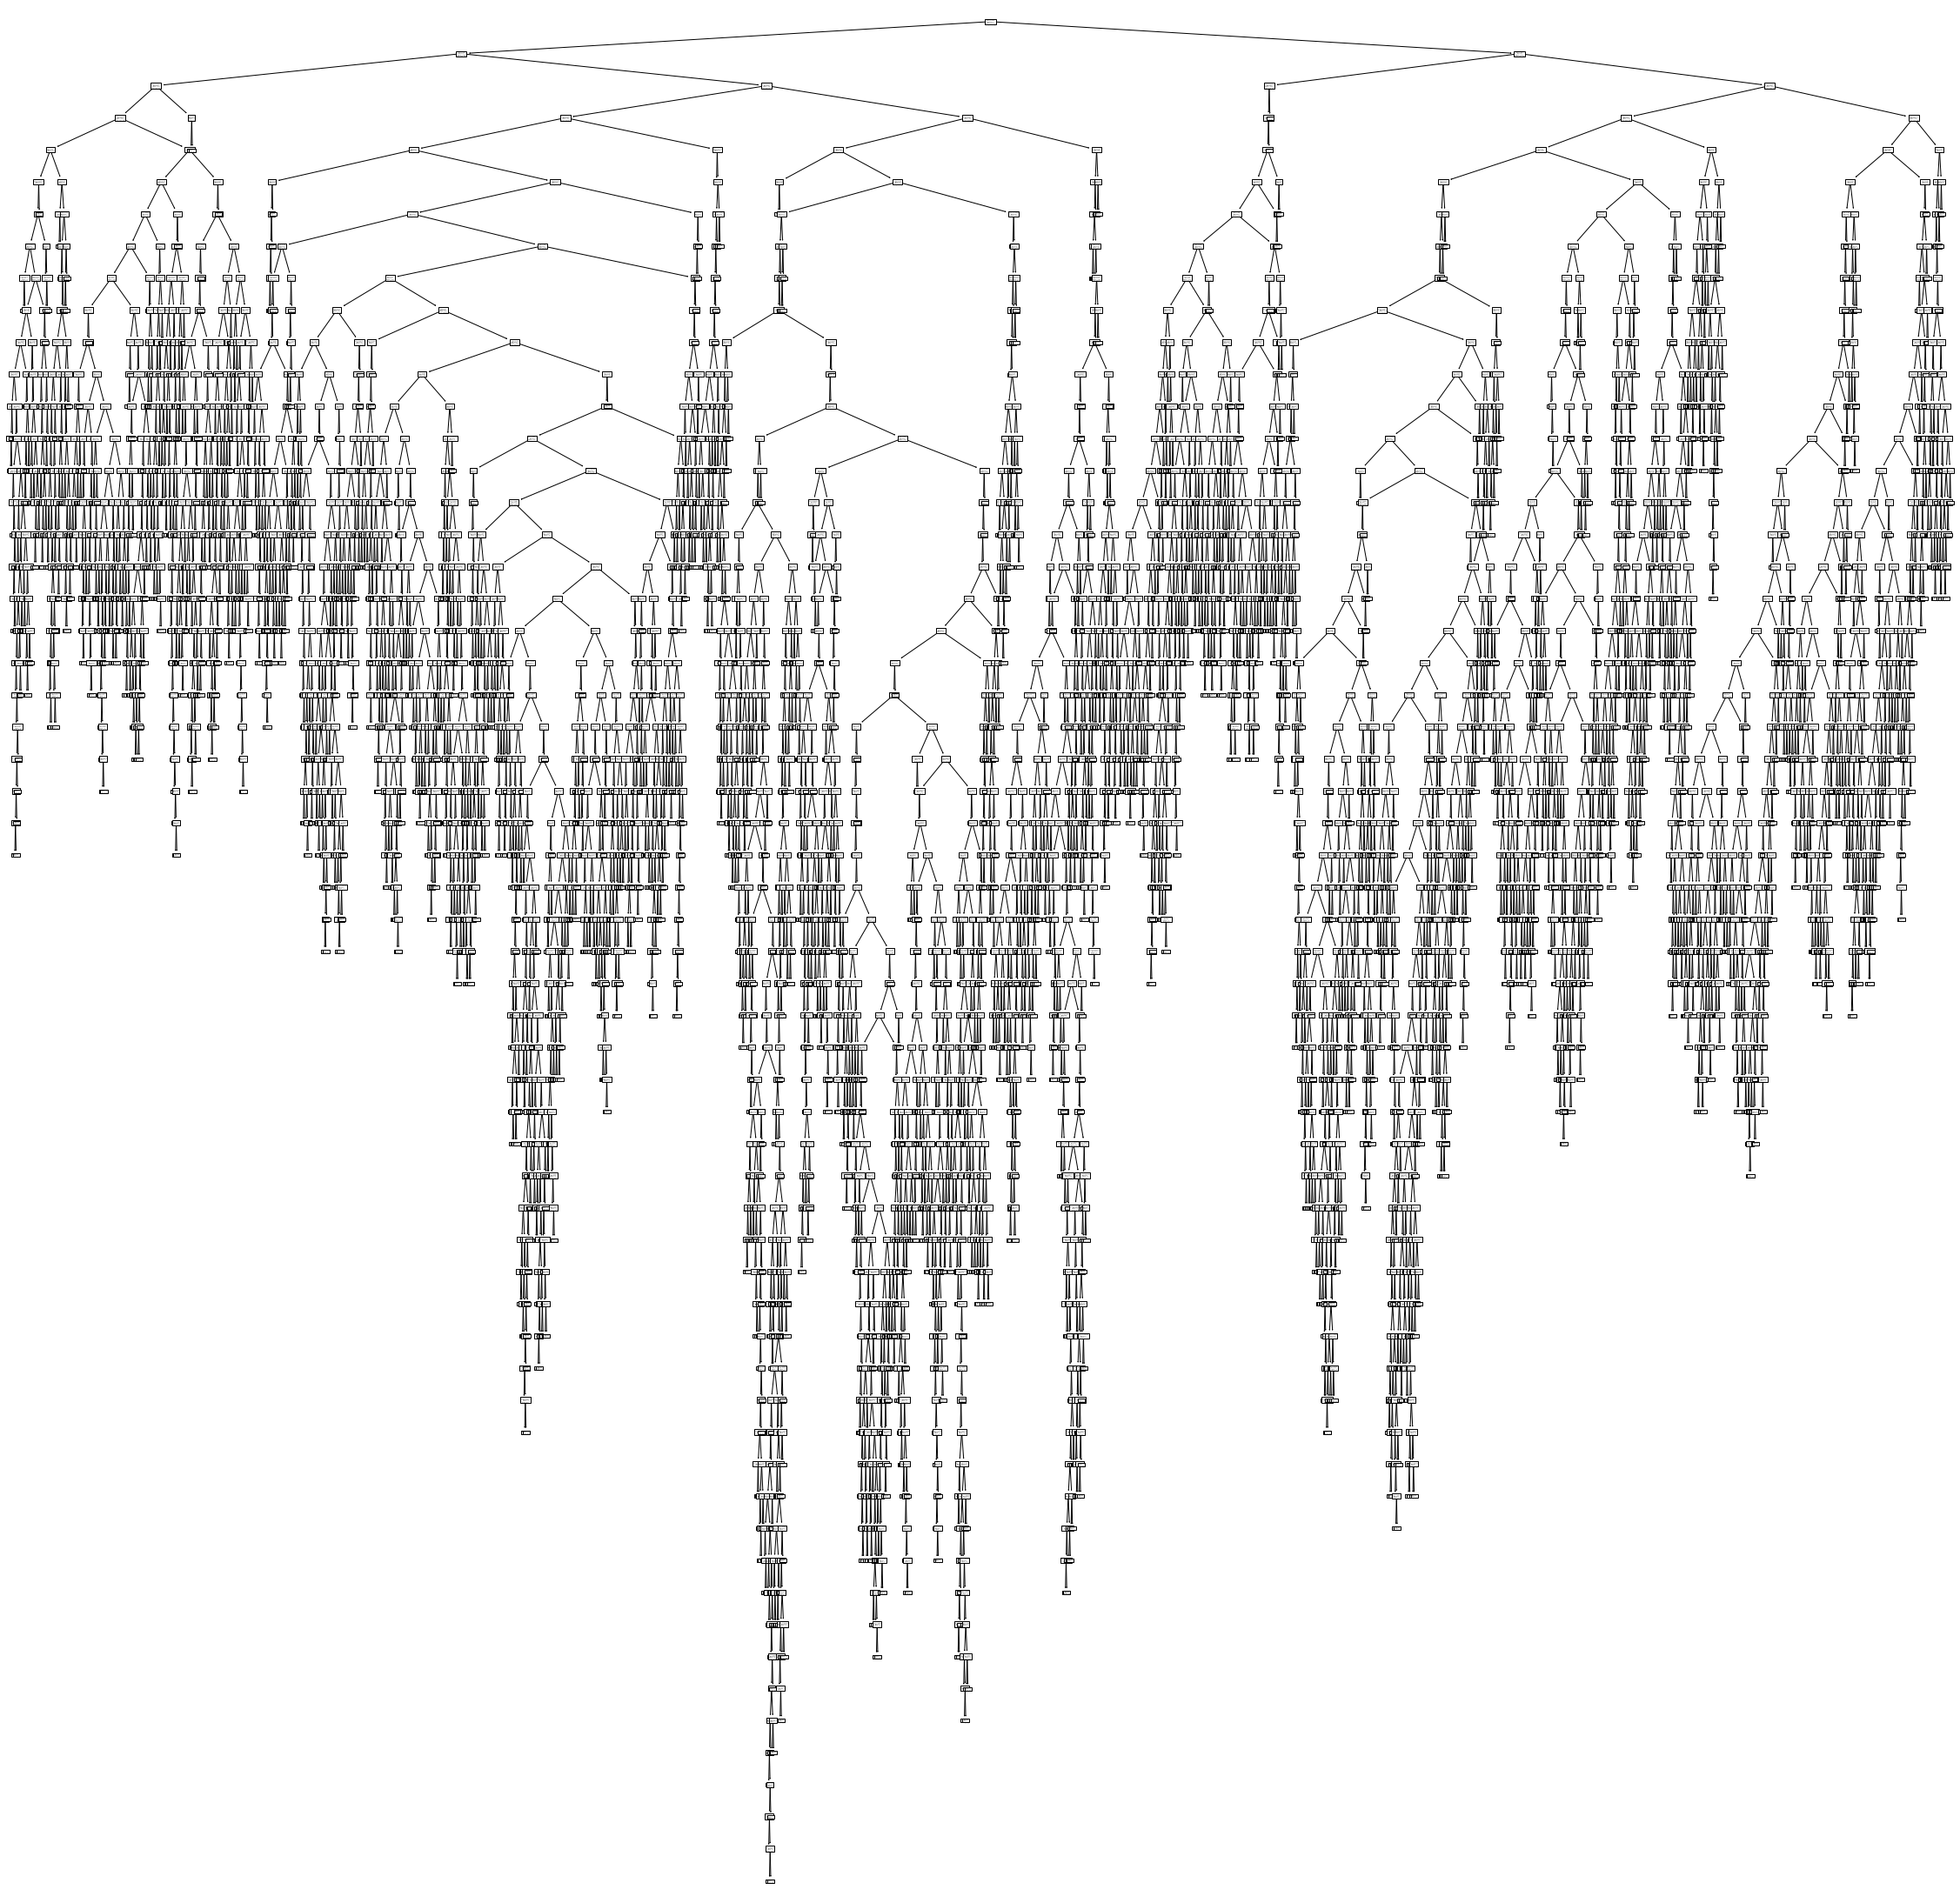

In [6]:
# Model 1 - Basically a Lookup Table (0.559, 0.56358 if using Train_Size=0.95)
decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X_train,y_train)

plt.figure(figsize=(40,40))
tree.plot_tree(decision_tree_model)
plt.show()

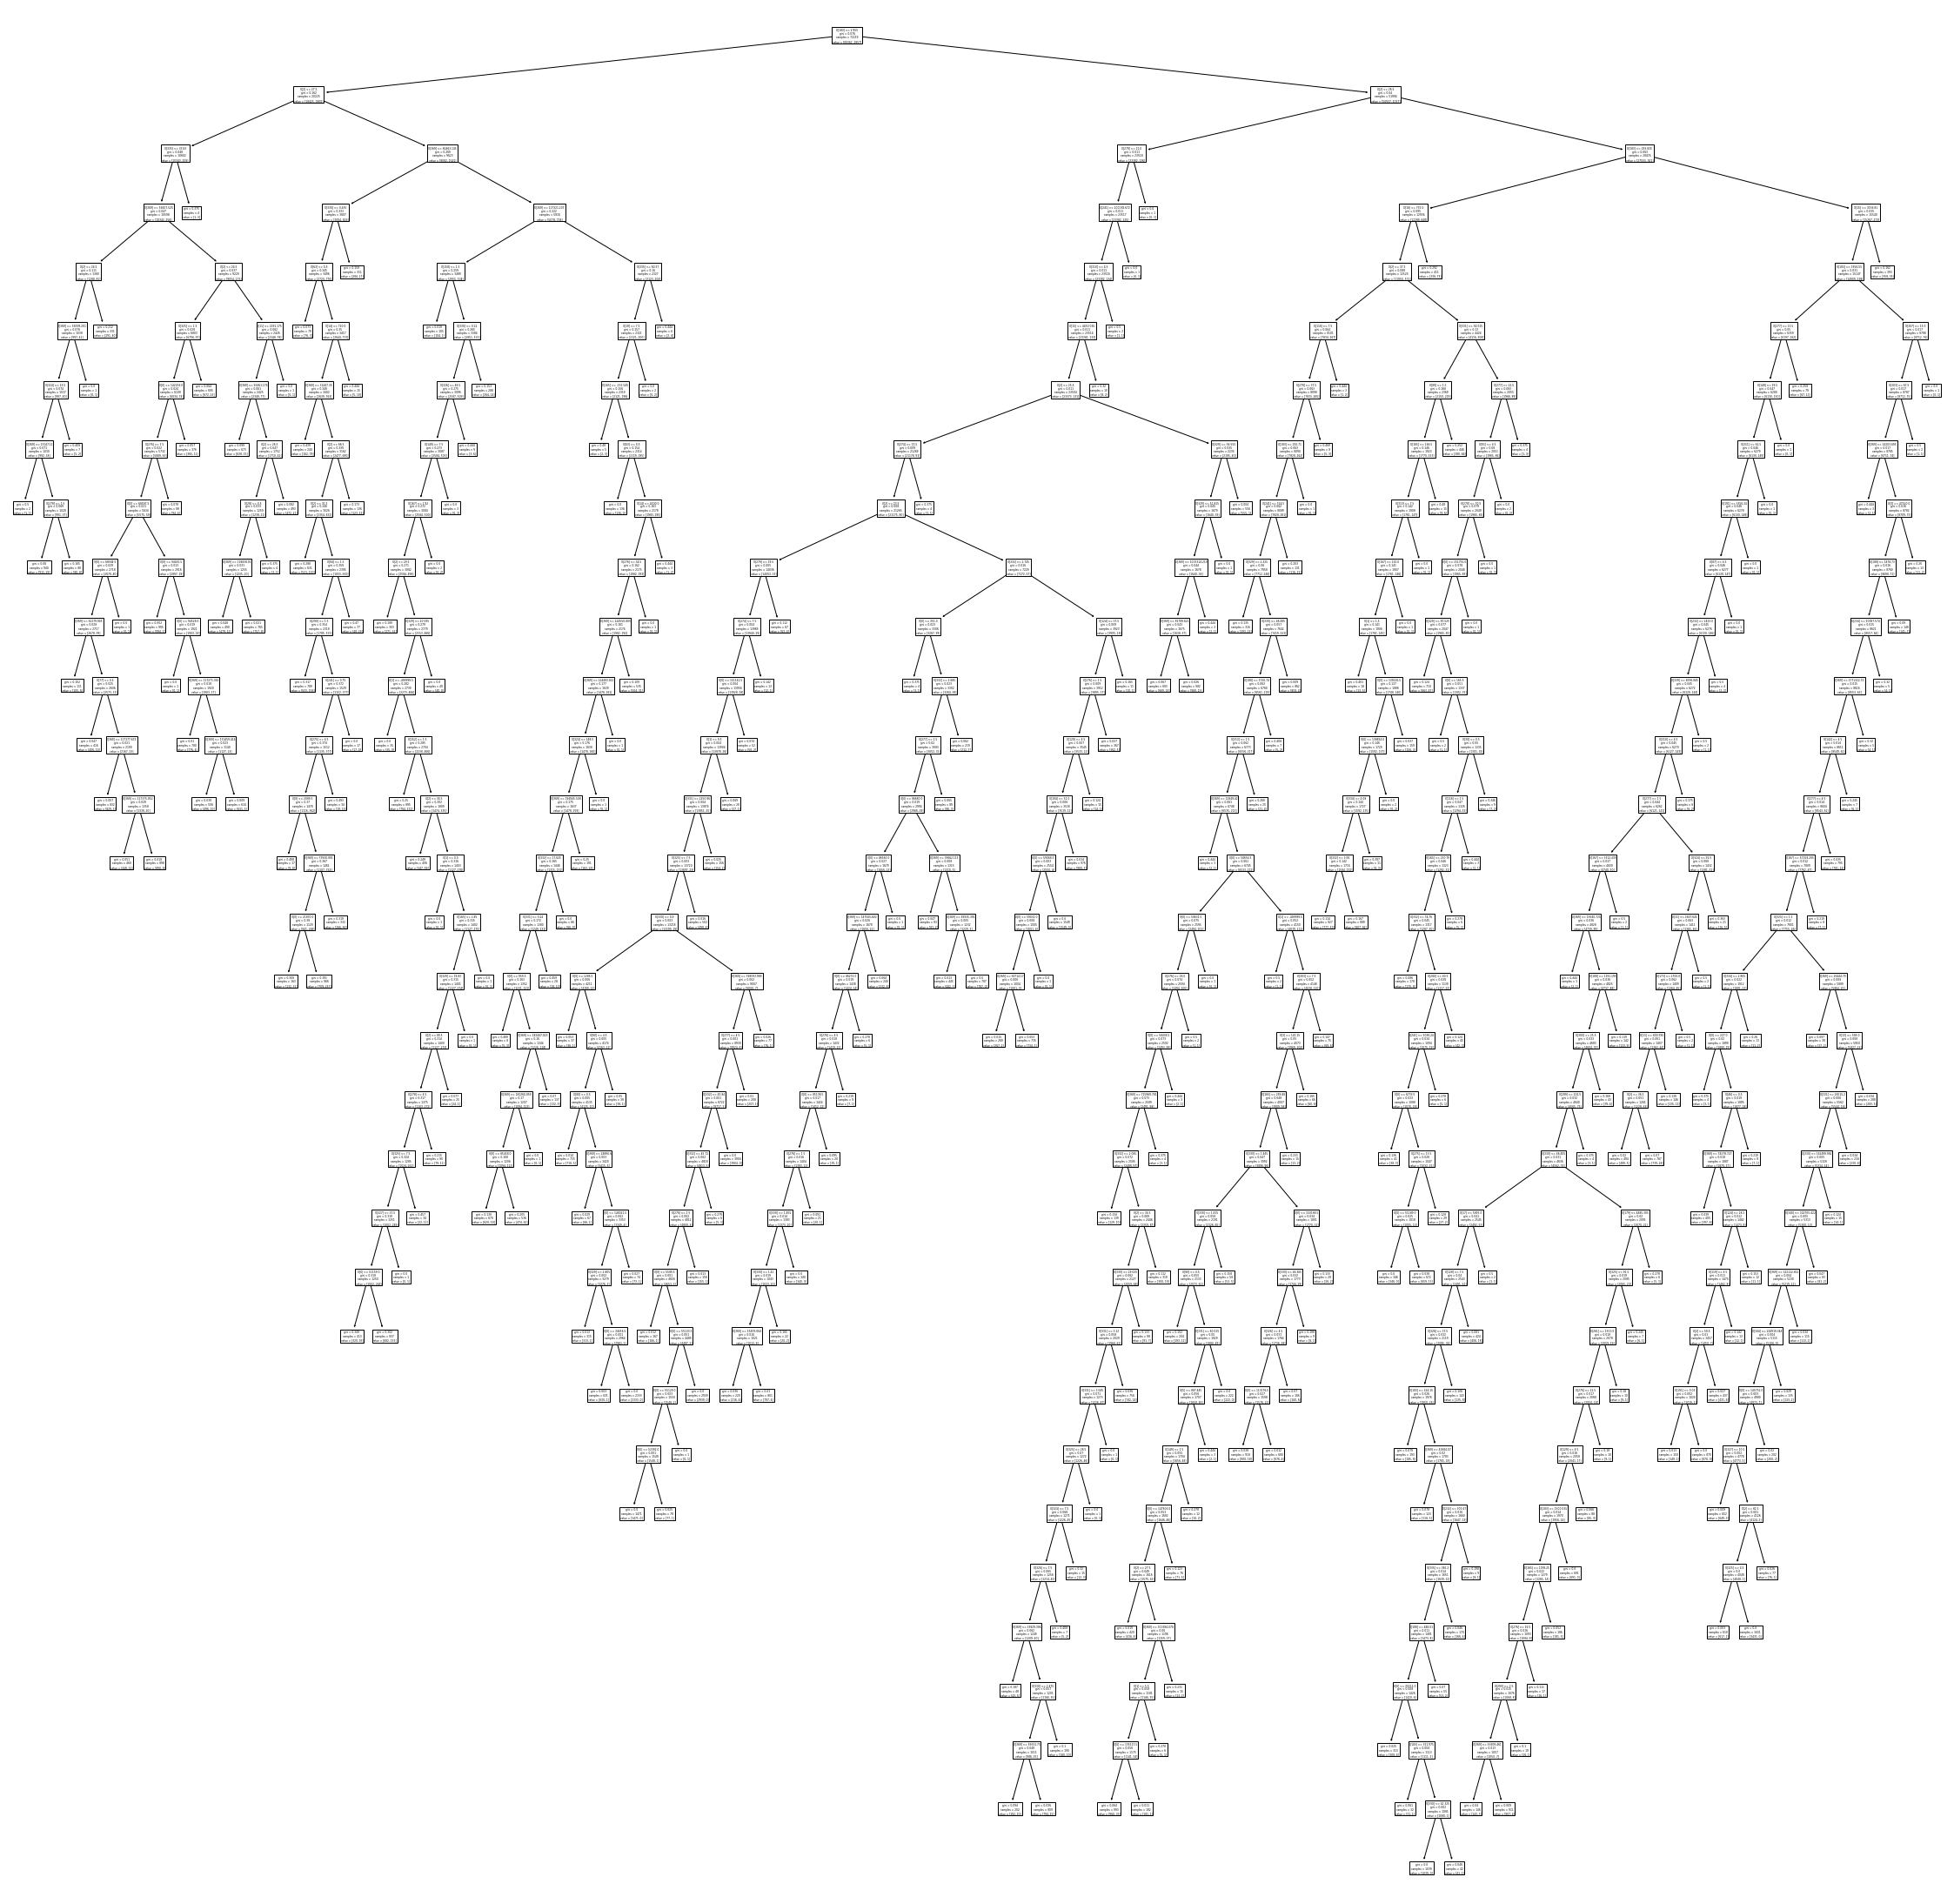

In [7]:
# Model 2 - AVERAGE MODEL, BUT STILL OVERFIT (0.50117)
decision_tree_model = DecisionTreeClassifier(min_samples_split=1000)

decision_tree_model.fit(X_train,y_train)

plt.figure(figsize=(40,40))
tree.plot_tree(decision_tree_model)
plt.show()

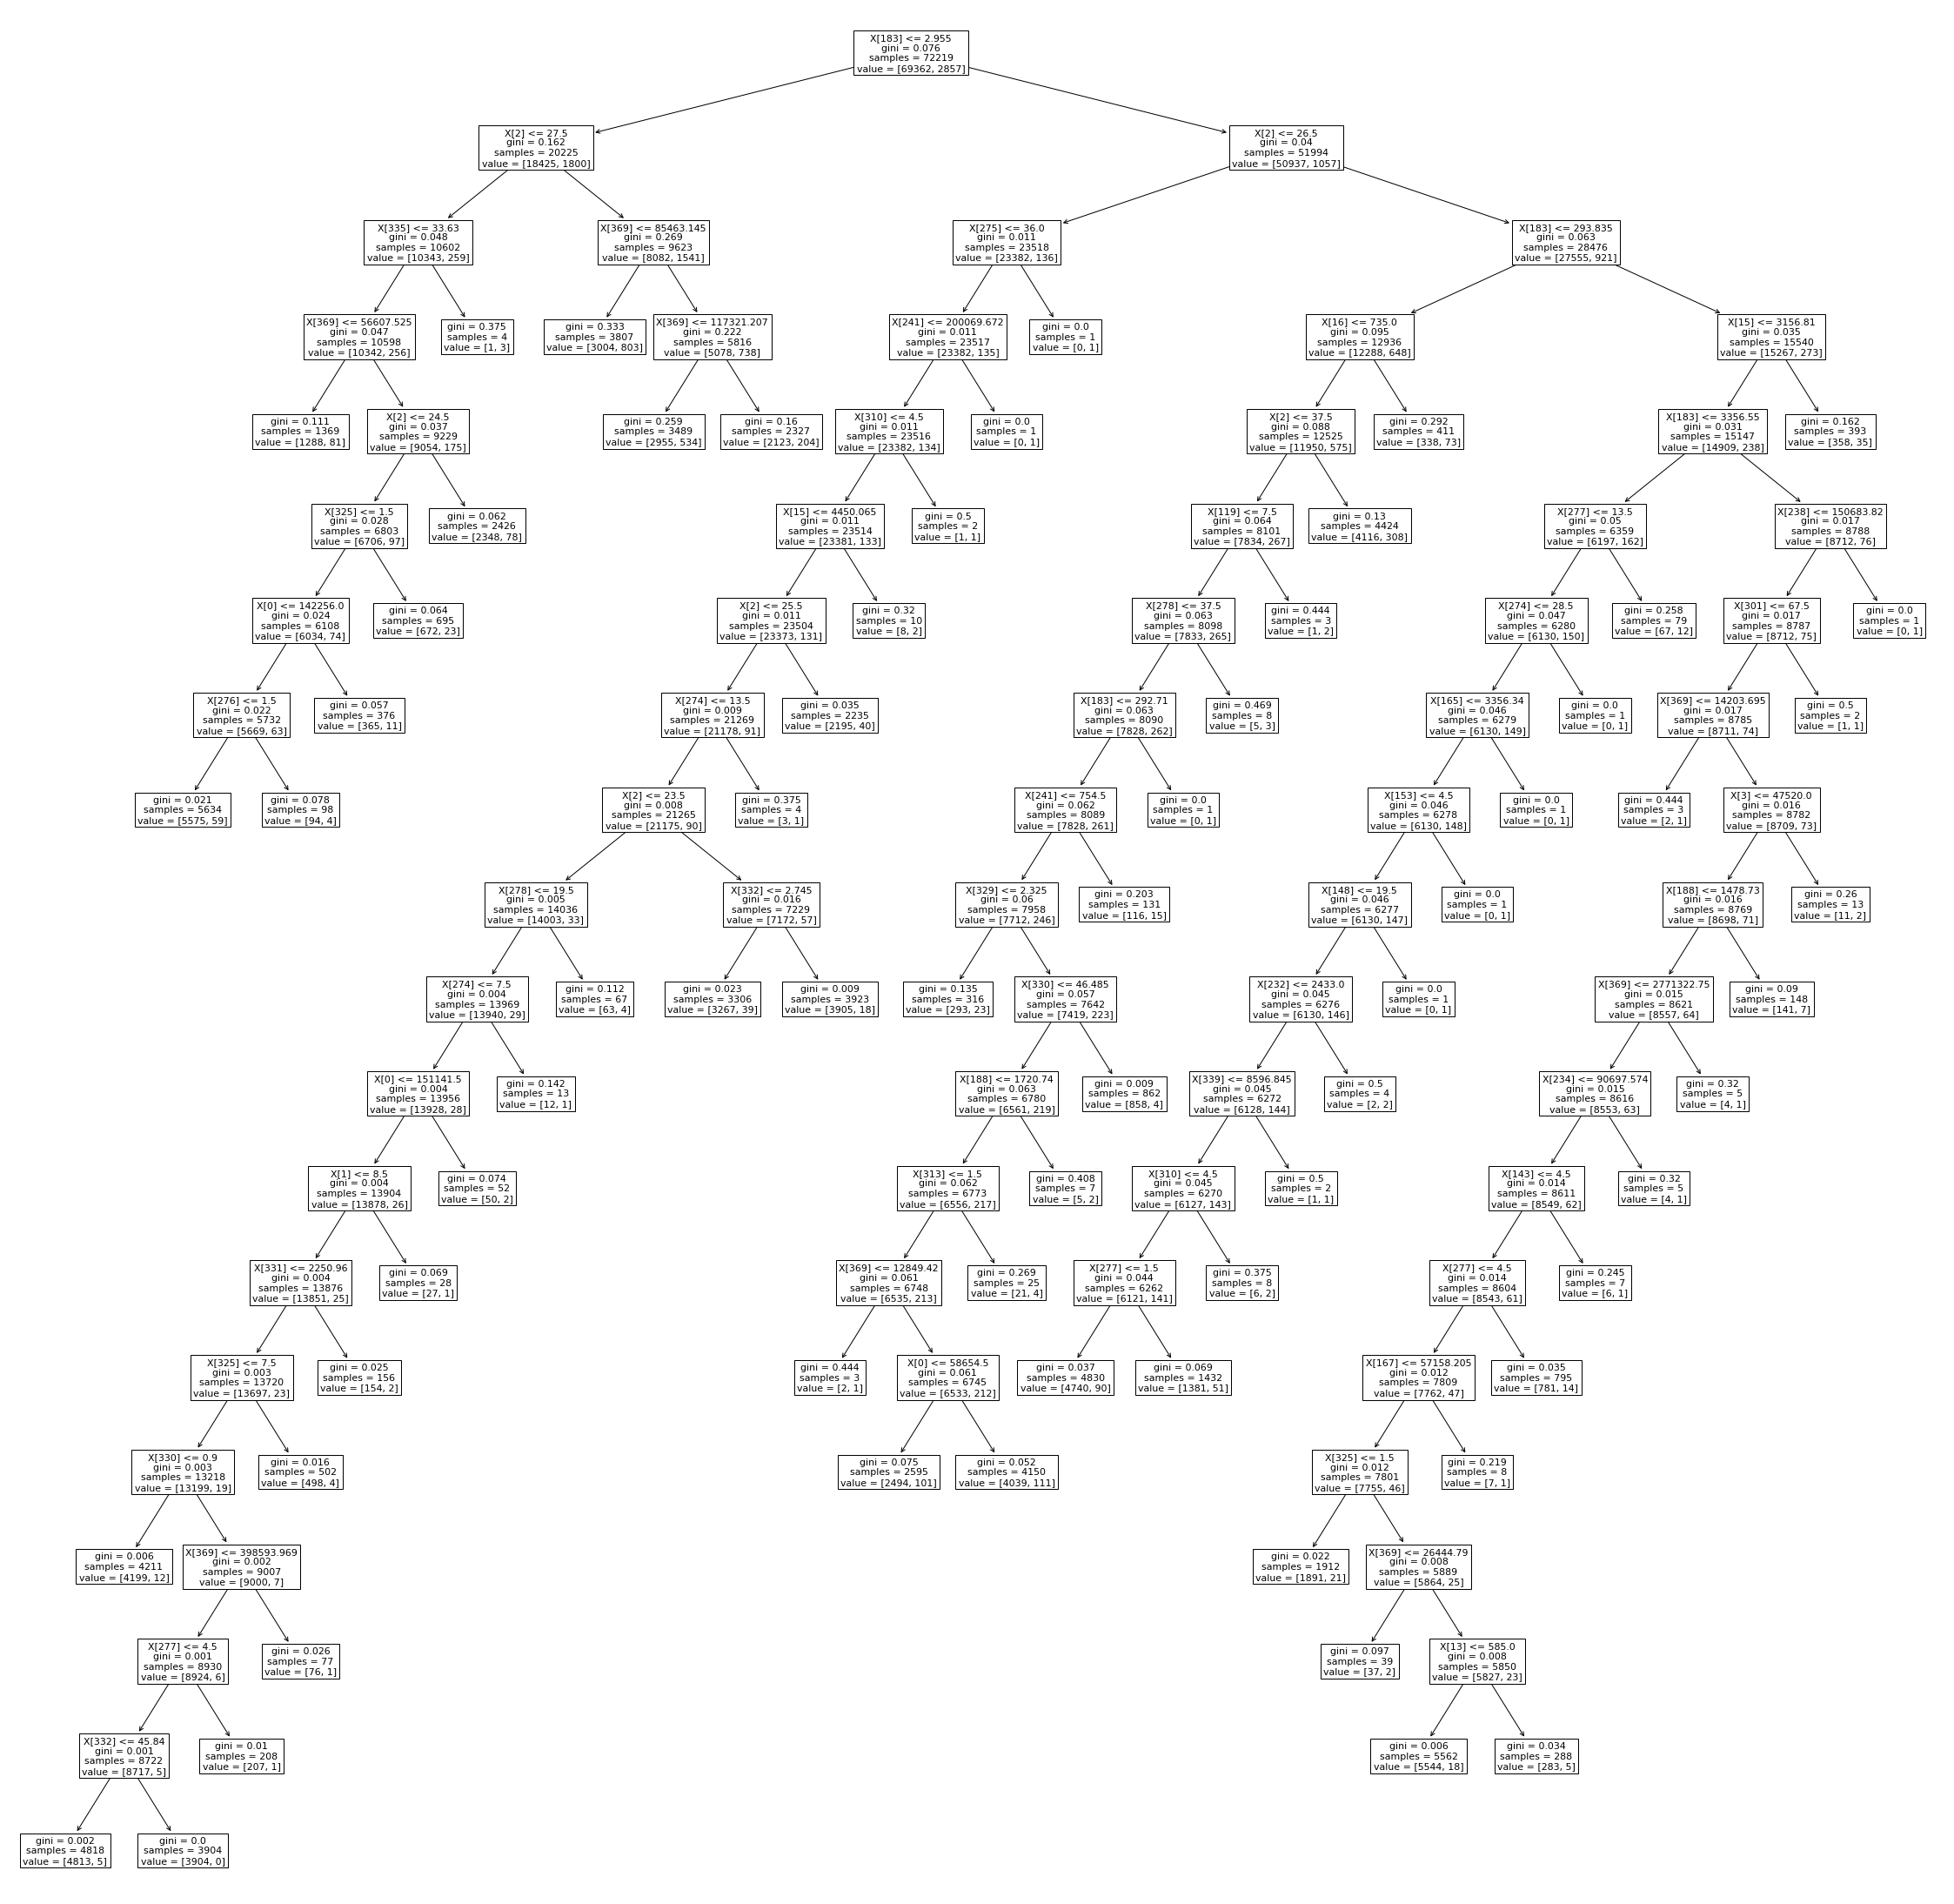

In [8]:
# Model 3 - GOOD MODEL (50%)
decision_tree_model = DecisionTreeClassifier(min_samples_split=5702)

decision_tree_model.fit(X_train,y_train)

plt.figure(figsize=(40,40))
tree.plot_tree(decision_tree_model)
plt.show()

In [19]:
# Model 4 - BAD MODEL - LEAF NODES TOO AMBIGUOUS (HIGH GINI SCORES)
decision_tree_model = DecisionTreeClassifier(min_samples_split=5702, max_leaf_nodes=15)

decision_tree_model.fit(X_train,y_train)

# plt.figure(figsize=(40,40))
# tree.plot_tree(decision_tree_model)
# plt.show()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5702,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
y_prediction = decision_tree_model.predict(X_test)

In [11]:
score = accuracy_score(y_test, y_prediction) * 100

In [12]:
print(f"The Y-Prediction Value has an Accuracy of {round(score,1)}% against the Y-Test Dataset.")

The Y-Prediction Value has an Accuracy of 96.0% against the Y-Test Dataset.


# Part Two

In [13]:
y_prediction_whole = decision_tree_model.predict(test_df)

In [14]:
santander_predicted_values = y_prediction_whole.tolist()

In [15]:
d = {"ID":test_df['ID'],"TARGET":santander_predicted_values}

In [16]:
santander_prediction_df = pd.DataFrame(d)

In [17]:
santander_prediction_df = santander_prediction_df.set_index('ID')
santander_prediction_df.head()

,TARGET
ID,
2,0
5,0
6,0
7,0
9,0


In [18]:
santander_prediction_df.to_csv("santander_submission.csv")